In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform, pdist

In [2]:
# Load the full grocery customer dataset
data = pd.read_csv('customer_personality.csv')

In [3]:
# Use a subset of the data for readability
data = data.sample(50, random_state=123)

In [4]:
# Use StandardScaler() to standardize input features
X = data[['Fruits', 'Meats']]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [5]:
# Agglomerative clustering using single linkage in scikit-learn
clusters = AgglomerativeClustering(n_clusters=4,
                                  linkage='single')
clusters = clusters.fit(X)

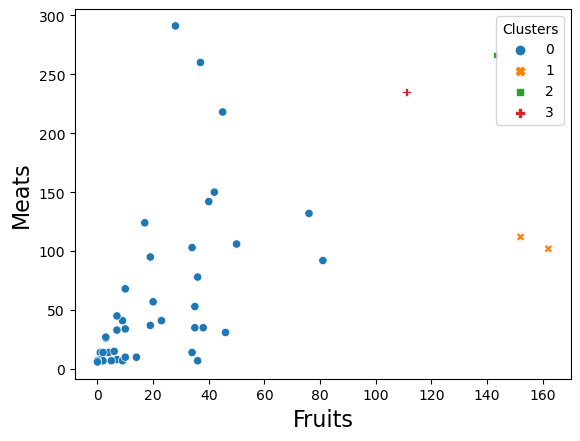

In [6]:
# Add the cluster labels to the dataset as strings
data['clusters'] = clusters.labels_.astype(str)

# Sort by cluster label (for plotting purposes)
data.sort_values(by='clusters', inplace=True)

# Plot clusters on the original data
p = sns.scatterplot(data=data, x='Fruits',
                    y='Meats', hue='clusters', 
                    style='clusters')
p.set_xlabel('Fruits', fontsize=16)
p.set_ylabel('Meats', fontsize=16)
p.legend(title='Clusters')

In [7]:
# Agglomerative clustering using scipy.cluster

# Calculate distance between all instances
distances = pdist(X)

# Convert distances into a square matrix
distances = squareform(distances)

# Define a clustering model with single linkage
clustersSciPy = linkage(distances, method='single')

/tmp/nix-shell.Tzpk8f/ipykernel_616/530877961.py:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clustersSciPy = linkage(distances, method='single')


Text(0.5, 0, 'Instance')

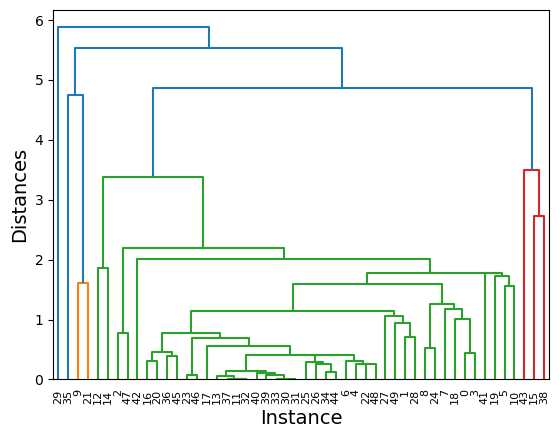

In [8]:
# Create the dendrogram
dendrogram(clustersSciPy, color_threshold=4)
plt.ylabel('Distances', fontsize=14)
plt.xlabel('Instance', fontsize=14)

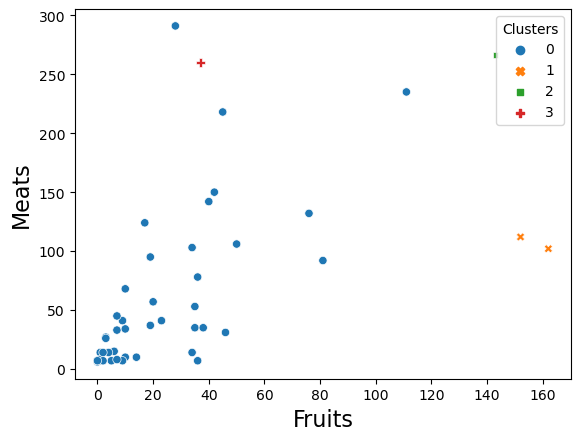

In [9]:
# add two more spending categories to X: 'Vegetables' and 'Grains'. 
# Re-run the code and examine changes in the output.

# Use StandardScaler() to standardize input features
X = data[['Fruits', 'Meats', 'Vegetables', 'Grains']]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

# Agglomerative clustering using single linkage in scikit-learn
clusters = AgglomerativeClustering(n_clusters=4,
                                  linkage='single')
clusters = clusters.fit(X)

# Add the cluster labels to the dataset as strings
data['clusters'] = clusters.labels_.astype(str)

# Sort by cluster label (for plotting purposes)
data.sort_values(by='clusters', inplace=True)

# Plot clusters on the original data
p = sns.scatterplot(data=data, x='Fruits',
                    y='Meats', hue='clusters', 
                    style='clusters')
p.set_xlabel('Fruits', fontsize=16)
p.set_ylabel('Meats', fontsize=16)
p.legend(title='Clusters')